# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np  
import re
import nltk as nl
# nl.download('punkt')
%matplotlib inline
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
data = pd.read_csv("fake_real_news_data.csv")

In [3]:
data.head()

,Title,Category,Description,Link,Class
0,ডাকসুর ভিপি’র দায়িত্ব নিচ্ছেন নুরুল,রাজনীতি,ঢাকা বিশ্ববিদ্যালয় কেন্দ্রীয় ছাত্র সংসদে (ডাকস...,www.prothomalo.com/bangladesh/article/1584785/...,Real
1,অস্ত্রোপচারের পর ভালো আছেন কাদের,রাজনীতি,বাংলাদেশ আওয়ামী লীগের সাধারণ সম্পাদক এবং সড়ক প...,www.prothomalo.com/bangladesh/article/1584632/...,Real
2,প্রধানমন্ত্রীর সাক্ষাৎ চান আন্দোলনরত শিক্ষকরা,রাজধানী,জাতীয় প্রেসক্লাবের সামনে দুদিন ধরে অবস্থান নিয়...,www.ittefaq.com.bd/capital/39030/প্রধানমন্ত্রী...,Real
3,"অফিসকক্ষ বুঝে নিতে চিঠি, দায়িত্ব নিচ্ছেন ভিপি নুর",শিক্ষাঙ্গন,প্রায় তিন দশক পর ডাকসু নির্বাচনের দরজা খুললেও ...,www.ittefaq.com.bd/education/39020/অফিসকক্ষ-বু...,Real
4,ঐক্যফ্রন্ট থেকে নির্বাচিতরাও শপথ নেবেন: সুলতান...,রাজনীতি,ঐক্যফ্রন্ট থেকে বহিষ্কৃত ডাকসুর সাবেক ভিপি ও ছ...,www.ittefaq.com.bd/politics/39038/ঐক্যফ্রন্ট-থ...,Real


# Quick Analysis

In [4]:
data.shape

(499, 5)

In [5]:
data.columns

Index(['Title', 'Category', 'Description', 'Link', 'Class'], dtype='object')

In [6]:
data.isnull().sum()

Title          0
Category       0
Description    0
Link           0
Class          0
dtype: int64

In [7]:
data['Class'].value_counts()

Real    256
Fake    243
Name: Class, dtype: int64

In [8]:
data['Category'].value_counts()

খেলা                   77
রাজনীতি                68
জাতীয়                 59
বিনোদন                 46
আন্তর্জাতিক            24
সারাদেশ                23
বিচিত্র                21
রহস্য                  20
\r\nখেলাধুলা\r\n       18
আন্তর্জাতিক            18
জাতীয়                 14
আন্তর্জাতিক\r\n        13
জাতীয়                  12
শিক্ষাঙ্গন             11
বিজ্ঞান-প্রযুক্তি      11
বিজ্ঞান ও প্রযুক্তি     9
খেলাধুলা                9
বিজ্ঞান                 9
অর্থনীতি                7
জানা অজানা              4
স্বাস্থ্য কথা           4
জীবন যাত্রা             3
বাণিজ্য                 2
সারা বাংলা              2
সাম্প্রতিক খবর          2
দুর্ঘটনা                2
রাজধানী                 2
প্রযুক্তি               1
একচেটিয়া               1
প্রযুক্তি বিশ্ব         1
বিজ্ঞান                 1
লাইফস্টাইল              1
স্বাস্থ্য ও চিকিৎসা     1
তথ্যপ্রযুক্তি           1
বিদেশ                   1
ব্যাবসা-বাণিজ্য         1
Name: Category, dtype: int64

# Data Processing

In [9]:
data.dropna(inplace=True)

### Denoising

In [10]:
import re, string, unicodedata
from bs4 import BeautifulSoup

def strip_html(text):
    soup = BeautifulSoup(text.strip(), "lxml")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

### Normalization

In [11]:
import string, re

def remove_punctuation(sentence):
    """Remove punctuation from list of tokenized words"""
    sentence = re.sub(r'’|‘|।','',sentence) #For Bangla only
    if isinstance(sentence, str):
        return sentence.translate(str.maketrans('', '',string.punctuation))
    
def remove_stopwords(sentence):
    """Remove stop words from list of tokenized words"""  
    bn_stopwords = []
    with open('stopwords-bn.txt', "r") as f:
        bn_stopwords = f.read().split()

    words = sentence.split()
    new_words = []
    
    for word in words:
        if word not in bn_stopwords:
            new_words.append(word)
    return ' '.join(new_words)

#### Applying Denosing and Normalization

In [12]:
columns_to_process = ['Title', 'Category', 'Description', 'Class']

In [13]:
for col in columns_to_process:
    data[col] = data[col].apply(lambda x: strip_html(x))
    data[col] = data[col].apply(lambda x: remove_between_square_brackets(x))
    data[col] = data[col].apply(lambda x: remove_punctuation(x))
    data[col] = data[col].apply(lambda x: remove_stopwords(x))

#### Other processing

In [14]:
# data['Class'].replace({'fake':'Fake'}, inplace=True)

#### Target Variable Encoding

In [15]:
data['Class'] = data['Class'].astype('category')
data['Class'] = data['Class'].cat.codes

In [16]:
data.shape

(499, 5)

# Data Partitioning

In [17]:
# X = data['Title']
# X = data['Description']
X = data['Title']+" "+data['Category']+" "+data['Description']

In [18]:
y = data['Class']

# Bag of Words
The following code uses the bag of words model to convert text documents into corresponding numerical features:

Count Vectorizer: The most straightforward one, it counts the number of times a token shows up in the document and uses this value as its weight.

In [19]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, 
                             min_df=5, 
                             max_df=0.7)

X = vectorizer.fit_transform(X).toarray() 

pickle.dump(vectorizer.vocabulary_,open("feature.pkl","wb"))

# Finding TF-IDF
The bag of words approach works fine for converting text to numbers. However, it has one drawback. It assigns a score to a word based on its occurrence in a particular document. It doesn't take into account the fact that the word might also be having a high frequency of occurrence in other documents as well. TFIDF resolves this issue by multiplying the term frequency of a word by the inverse document frequency. The TF stands for "Term Frequency" while IDF stands for "Inverse Document Frequency".

The term frequency is calculated as:

$$Term\;frequency = \frac{(Number\;of\;Occurrences\;of\;a\;word)}{(Total\;words\;in\;the\;document)}$$

And the Inverse Document Frequency is calculated as:

$$IDF(word) = Log[\frac{(Total\;number\;of\;documents)}{(Number\;of\;documents\;containing\;the\;word)}]$$

In [20]:
from sklearn.feature_extraction.text import TfidfTransformer  

tfidfconverter = TfidfTransformer()  

X = tfidfconverter.fit_transform(X).toarray()  

# Constructing Training and Testing Sets

In [21]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234, stratify=y)

# Model Training

In [22]:
from sklearn.ensemble import RandomForestClassifier

#### Training classifier on training data

In [23]:
model = RandomForestClassifier(n_estimators=1000, criterion='gini', random_state=123)  
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

#### Making predictions on test data

In [24]:
y_pred = model.predict(X_test)

# Evaluating the Model Performance


In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [26]:
# Confusion Matrix
print(confusion_matrix(y_test,y_pred))

[[37 12]
 [ 2 49]]


In [27]:
# Classification Report  
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84        49
           1       0.80      0.96      0.88        51

   micro avg       0.86      0.86      0.86       100
   macro avg       0.88      0.86      0.86       100
weighted avg       0.87      0.86      0.86       100



In [28]:
# Accuracy
print(accuracy_score(y_test, y_pred))

0.86


# Manually making predictions

In [29]:
title = "সহজ ম্যাচ কঠিন করে জিতলেন ধোনি"
category = "খেলা সংবাদ"
description = "৪ ওভারে ২৩ রান দরকার। অক্ষর প্যাটেলের শেষ ওভারের প্রথম ৫ বলে কোনো রান নিতে পারলেন না মহেন্দ্র সিং ধোনি! শেষ বলে এক রান এল। হঠাৎ করেই জমে উঠল ম্যাচ। ৩ ওভারে দরকার ২২ রান। কিন্তু ১৮তম ওভারে কিমো পল সব আগ্রহ শেষ করে দিল। ১১ রান দিয়ে ফেললেন পল। পরের ওভারেও এসেছে ৯ রান। এর পর আর চেন্নাই সুপার কিংসকে আটকাতে পারেনি দিল্লি ক্যাপিটালস। ৬ উইকেটের সহজ জয়ে শীর্ষে চলে গেল ধোনির দল।"
link = "https://www.prothomalo.com/sports/article/1585453/সহজ-ম্যাচ-কঠিন-করে-জিতলেন-ধোনি"

new_data = pd.DataFrame({'Title': [title],
                         'Category': [category],
                         'Description': [description],
                         'Link': [link]})


for col in ['Title', 'Category', 'Description']:
    new_data[col] = new_data[col].apply(lambda x: strip_html(x))
    new_data[col] = new_data[col].apply(lambda x: remove_between_square_brackets(x))
    new_data[col] = new_data[col].apply(lambda x: remove_punctuation(x))
    new_data[col] = new_data[col].apply(lambda x: remove_stopwords(x))

    
X_new = new_data['Title']+" "+new_data['Category']+" "+new_data['Description']
loaded_vec = CountVectorizer(decode_error="replace", vocabulary=pickle.load(open("feature.pkl", "rb")))
X_new = loaded_vec.fit_transform(X_new).toarray()
X_new = tfidfconverter.fit_transform(X_new).toarray()


if model.predict(X_new)[0]==1:
    print("This news is Real!")
else:
    print("This news is Fake!")

This news is Real!


# Word Cloud Analysis

In [30]:
from nltk.tokenize import word_tokenize

news_data = data[data['Class']==0]  # Use 0 for Fake, 1 for Real
token_data = news_data['Title'] + news_data['Category'] + news_data['Description']
token_data = token_data.str.cat(sep=' ')
tokens = word_tokenize(token_data)
vocabulary = set(tokens)
print(len(vocabulary))

10700


In [31]:
frequency_dist = nl.FreqDist(tokens)
sorted(frequency_dist,key=frequency_dist.__getitem__, reverse=True)[0:20]

['কের',
 'এক',
 'যায়',
 'েথেক',
 'িতিন',
 'কথা',
 'একিট',
 'হেয়',
 'করেত',
 'িনেয়',
 'তেব',
 'হেব',
 'বছর',
 'হেয়েছ',
 'হয়েছে',
 'বেল',
 'সময়',
 'বেলন',
 'হচ্েছ',
 'খবর']

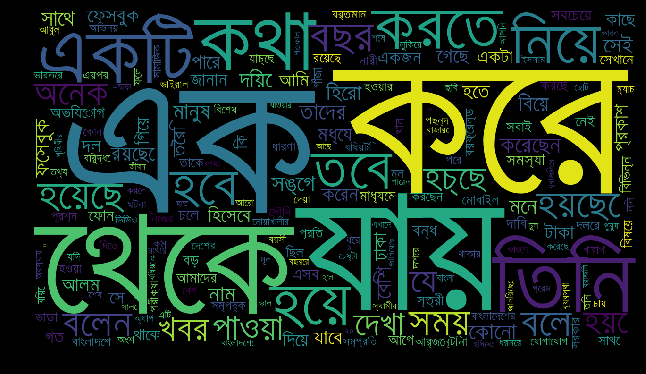

In [32]:
from wordcloud import WordCloud

wordcloud = WordCloud(font_path='Siyamrupali.ttf', 
                      width=1280, #1920 x 1080 
                      height=720).generate_from_frequencies(frequency_dist)
plt.figure(figsize=(10,5), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()